# Let's make some slider bars

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab

import scipy as sp
from scipy.optimize import curve_fit

from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls

gdrive/  sample_data/


In [13]:
cd gdrive/My Drive/denver-data

[Errno 2] No such file or directory: 'gdrive/My Drive/denver-data'
/content/gdrive/My Drive/denver-data


In [14]:
ls

1_UsingColab_andLasio.ipynb  awesome-plot.pdf  well_data.csv
2_sliderbar.ipynb            petro-stats.csv
4900722147_722147B.las       RAPI3723253.csv


### Wyoming production data, had to change from a .xls to a .csv

In [15]:
df = pd.read_csv('RAPI3723253.csv')
df.head(10)

,Api_Res,Month/Year,OIL BBLS,GAS MCF,WATER BBLS,DAYS
0,3723253571,01/1994,0,0,0,0
1,3723253571,02/1994,652,9208,0,3
2,3723253571,03/1994,4262,84878,146,31
3,3723253571,04/1994,2244,50735,211,30
4,3723253571,05/1994,1404,33936,112,28
5,3723253571,06/1994,1415,32551,113,29
6,3723253571,07/1994,1065,26010,94,27
7,3723253571,08/1994,800,18745,59,21
8,3723253571,09/1994,1230,18257,84,30
9,3723253571,10/1994,739,12638,27,24


In [16]:
df = df.rename(columns={"OIL BBLS":"oilBBLS", "GAS MCF":"gasMCF","WATER BBLS":"waterBBLS", "Month/Year":"Month_Year"})

df.head()

,Api_Res,Month_Year,oilBBLS,gasMCF,waterBBLS,DAYS
0,3723253571,01/1994,0,0,0,0
1,3723253571,02/1994,652,9208,0,3
2,3723253571,03/1994,4262,84878,146,31
3,3723253571,04/1994,2244,50735,211,30
4,3723253571,05/1994,1404,33936,112,28


Let's make a quick QC plot (no sliders)

Text(0, 0.5, 'BBLs per Month')

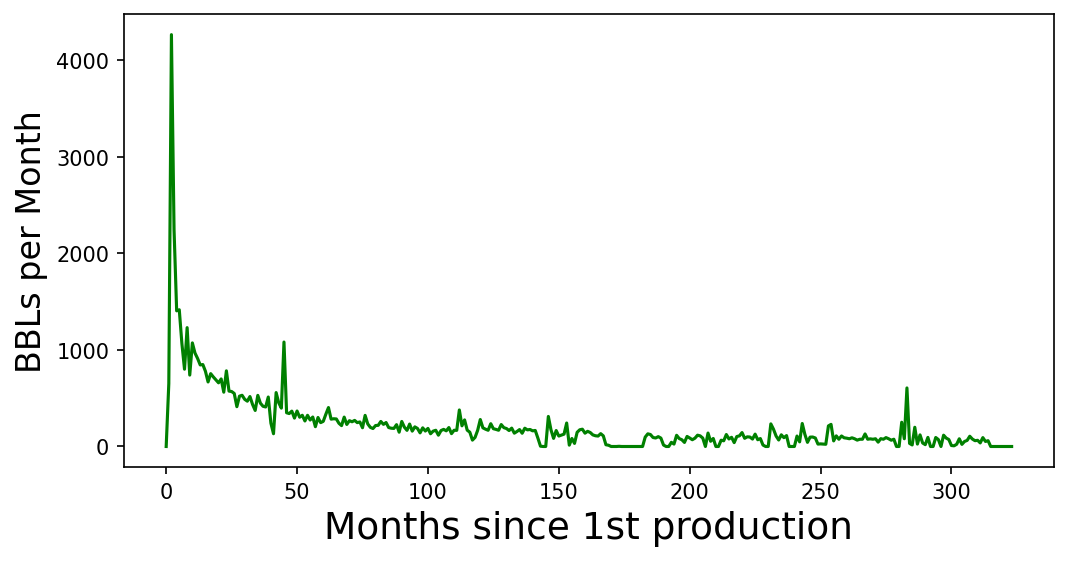

In [18]:
plt.figure(figsize=(8,4), dpi=150)
plt.plot(df.index, df.oilBBLS, color='g')
plt.xlabel('Months since 1st production', size = 18)
plt.ylabel('BBLs per Month', size =16)

In [19]:
max(df.index)

323

# Sick sliderZZZ

Number of Months
262


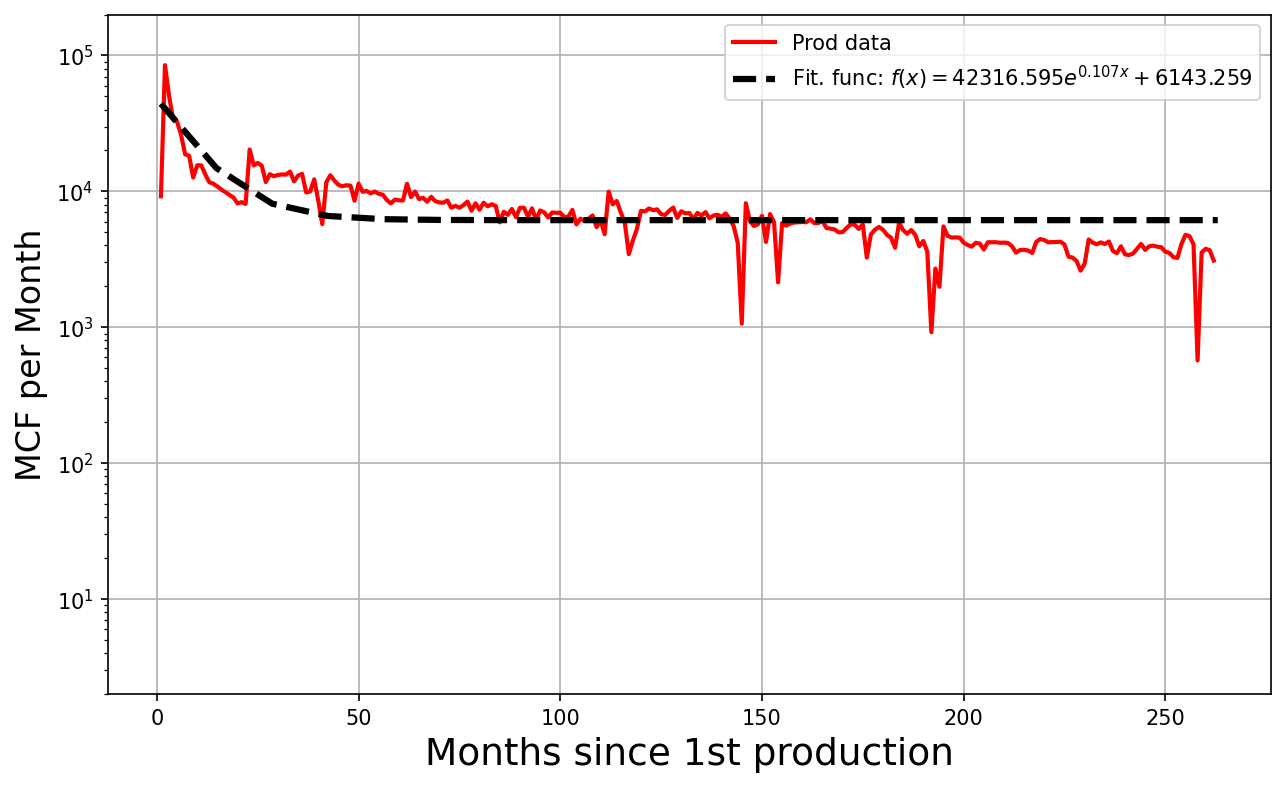

In [34]:

#@title String fields

Fluid_type = 'Gas' #@param ["Oil", "Gas", "Water"]


#@title What Months do you want to show { display-mode: "form" }
MinMonth_slider = 1 #@param {type:"slider", min:1, max:323, step:1}
MaxMonth_slider = 263 #@param {type:"slider", min:0, max:323, step:1}

#print(MinMonth_slider)
#print(MaxMonth_slider)

if MinMonth_slider > MaxMonth_slider:
  print('Error Error!, check min and max month')

def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

plt.figure(figsize=(10,6), dpi=150)

if Fluid_type == "Oil":
    y = df.oilBBLS[MinMonth_slider:MaxMonth_slider]
    p0 = (1.,1.e-12,1.) # starting search koefs
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.oilBBLS[MinMonth_slider:MaxMonth_slider], color='g', linewidth=2, label='Prod data')
elif Fluid_type == "Gas":
    y = df.gasMCF[MinMonth_slider:MaxMonth_slider]  
    p0 = (1.,1.e-12,1.) # starting search koefs
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.gasMCF[MinMonth_slider:MaxMonth_slider], color='r', linewidth=2, label='Prod data')
elif Fluid_type == "Water":
    p0 = (1.,1.e-11,1.) # starting search koefs
    y = df.waterBBLS[MinMonth_slider:MaxMonth_slider]
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.waterBBLS[MinMonth_slider:MaxMonth_slider], color='b', linewidth=2, label='Prod data')


x = df.index[MinMonth_slider:MaxMonth_slider]

opt, pcov = curve_fit(model_func, x, y, p0, maxfev=50000)
a, k, b = opt


x2 = np.linspace(MinMonth_slider, MaxMonth_slider, 20)
y2 = model_func(x2, a, k, b)


plt.plot(x2, y2, linewidth=3, linestyle='--', color='black', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.legend()
plt.grid(True)
plt.xlabel('Months since 1st production', size = 18)

if Fluid_type == "Oil":
  plt.ylim(2,20000)
  plt.ylabel('BBLs per Month', size =16)
elif Fluid_type == "Gas":
  plt.ylim(2,200000)
  plt.ylabel('MCF per Month', size =16)
elif Fluid_type == "water":
  plt.ylim(2,2000)
  plt.ylabel('BBL per month', size =16)


print('Number of Months')
print(MaxMonth_slider- MinMonth_slider,)